In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

In [11]:
df = pd.read_csv('D:/MLPdata/recipes.csv')

In [12]:
df.columns
df.isna().sum()

Unnamed: 0                         0
RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
R

In [13]:
#removing missing values from rating and cooktime

df.dropna(subset=['AggregatedRating','CookTime'], inplace=True)
df.isna().sum()


Unnamed: 0                         0
RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                           0
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        0
Images                             0
RecipeCategory                   238
Keywords                        5622
RecipeIngredientQuantities         0
RecipeIngredientParts              0
AggregatedRating                   0
ReviewCount                        0
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                 80995
R

In [14]:
df1= df[['CookTime','ReviewCount','Calories','FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent','AggregatedRating']]

In [15]:
print(df1.isna().sum())
print(df1.shape)

CookTime               0
ReviewCount            0
Calories               0
FatContent             0
SaturatedFatContent    0
CholesterolContent     0
SodiumContent          0
CarbohydrateContent    0
FiberContent           0
SugarContent           0
ProteinContent         0
AggregatedRating       0
dtype: int64
(226510, 12)


In [16]:
#Create binary rating and make it type int
df1['BinaryRating'] = (df1['AggregatedRating'] > 3.5).astype(int)

print(df1.shape)



(226510, 13)


C:\Users\ACER\AppData\Local\Temp\ipykernel_13408\1579252178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BinaryRating'] = (df1['AggregatedRating'] > 3.5).astype(int)


In [17]:
df1.dtypes

CookTime                object
ReviewCount            float64
Calories               float64
FatContent             float64
SaturatedFatContent    float64
CholesterolContent     float64
SodiumContent          float64
CarbohydrateContent    float64
FiberContent           float64
SugarContent           float64
ProteinContent         float64
AggregatedRating       float64
BinaryRating             int32
dtype: object

In [18]:
# Convert 'CookTime' from object to float
df1['CookTime'] = pd.to_numeric(df1['CookTime'], errors='coerce').astype(float)


C:\Users\ACER\AppData\Local\Temp\ipykernel_13408\3364692338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CookTime'] = pd.to_numeric(df1['CookTime'], errors='coerce').astype(float)


In [19]:
df1.dtypes

CookTime               float64
ReviewCount            float64
Calories               float64
FatContent             float64
SaturatedFatContent    float64
CholesterolContent     float64
SodiumContent          float64
CarbohydrateContent    float64
FiberContent           float64
SugarContent           float64
ProteinContent         float64
AggregatedRating       float64
BinaryRating             int32
dtype: object

In [22]:
#Implementing Decision Tree

features = ['CookTime','ReviewCount','Calories','FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

x = df1[features]
y = df1[['BinaryRating']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8683501832148691

Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.11      0.10      3031
           1       0.94      0.92      0.93     42271

    accuracy                           0.87     45302
   macro avg       0.51      0.52      0.52     45302
weighted avg       0.88      0.87      0.87     45302


Confusion Matrix:
[[  336  2695]
 [ 3269 39002]]


In [23]:
# Checking the number of 1's as the model is too accurate for that
count_ones = (df1['BinaryRating'] == 1).sum()

print("Number of instances where column value is 1:", count_ones)


Number of instances where column value is 1: 211073


In [24]:

# Define random over sampler
oversampler = RandomOverSampler(random_state=42)

# Perform oversampling
X_resampled, y_resampled = oversampler.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9584981641596589

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42187
           1       1.00      0.92      0.96     42243

    accuracy                           0.96     84430
   macro avg       0.96      0.96      0.96     84430
weighted avg       0.96      0.96      0.96     84430


Confusion Matrix:
[[42178     9]
 [ 3495 38748]]


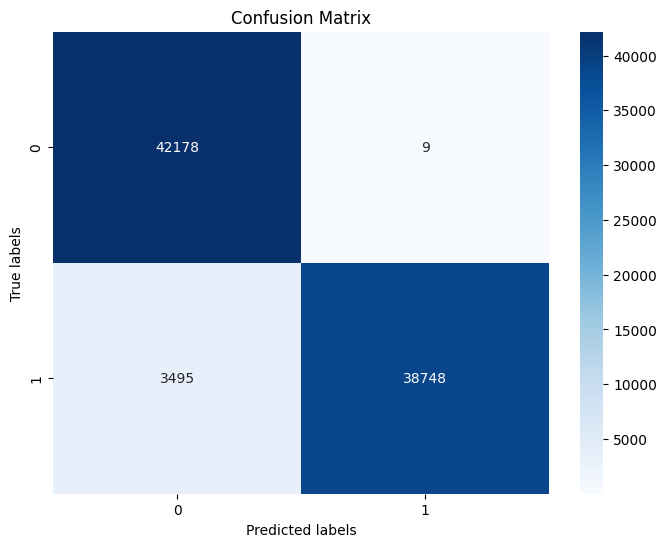

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()